In [4]:
# Import Libraries
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sys
sys.path.append('../src')
from data_processing import calculate_metrics, get_top_performers

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('✓ Libraries imported successfully!')


✓ Libraries imported successfully!


In [5]:
# Generate Sample Sales Data
np.random.seed(42)
dates = pd.date_range('2024-01-01', '2024-12-31', freq='D')
n_records = len(dates)

sales_data = pd.DataFrame({
    'date': dates,
    'product': np.random.choice(['Product A', 'Product B', 'Product C', 'Product D'], n_records),
    'quantity': np.random.randint(10, 100, n_records),
    'price': np.random.uniform(20, 200, n_records),
    'region': np.random.choice(['North', 'South', 'East', 'West'], n_records)
})

sales_data['revenue'] = sales_data['quantity'] * sales_data['price']
sales_data.to_csv('../data/sales_data.csv', index=False)

print(f'✓ Generated {len(sales_data):,} sales records')
sales_data.head(10)

✓ Generated 366 sales records


,date,product,quantity,price,region,revenue
0,2024-01-01,Product C,51,41.387225,East,2110.748471
1,2024-01-02,Product D,16,41.154724,South,658.475591
2,2024-01-03,Product A,25,136.857854,South,3421.446360
3,2024-01-04,Product C,99,154.288078,East,15274.519749
4,2024-01-05,Product C,69,125.006378,South,8625.440063
5,2024-01-06,Product D,11,193.191059,East,2125.101646
6,2024-01-07,Product A,10,87.476704,South,874.767043
7,2024-01-08,Product A,57,71.428176,East,4071.406005
8,2024-01-09,Product C,21,176.347843,North,3703.304705
9,2024-01-10,Product B,78,60.247251,West,4699.285573


In [6]:
# Basic Data Analysis
print('='*50)
print('SALES SUMMARY REPORT')
print('='*50)

metrics = calculate_metrics(sales_data)
for key, value in metrics.items():
    if 'revenue' in key:
        print(f'{key.replace("_", " ").title()}: ${value:,.2f}')
    else:
        print(f'{key.replace("_", " ").title()}: {value:,.0f}')

print('\n' + '='*50)
print('TOP 3 PRODUCTS BY REVENUE')
print('='*50)
print(get_top_performers(sales_data, by='product', n=3))

SALES SUMMARY REPORT
Total Revenue: $2,089,366.80
Avg Revenue Per Sale: $5,708.65
Total Quantity Sold: 19,148
Unique Products: 4

TOP 3 PRODUCTS BY REVENUE
     product        revenue
0  Product D  568684.908903
1  Product A  540941.097928
2  Product C  517411.440698


C:\Users\assad\AppData\Local\Temp\ipykernel_21216\3265796321.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = sales_data.groupby(pd.Grouper(key='date', freq='M'))['revenue'].sum()


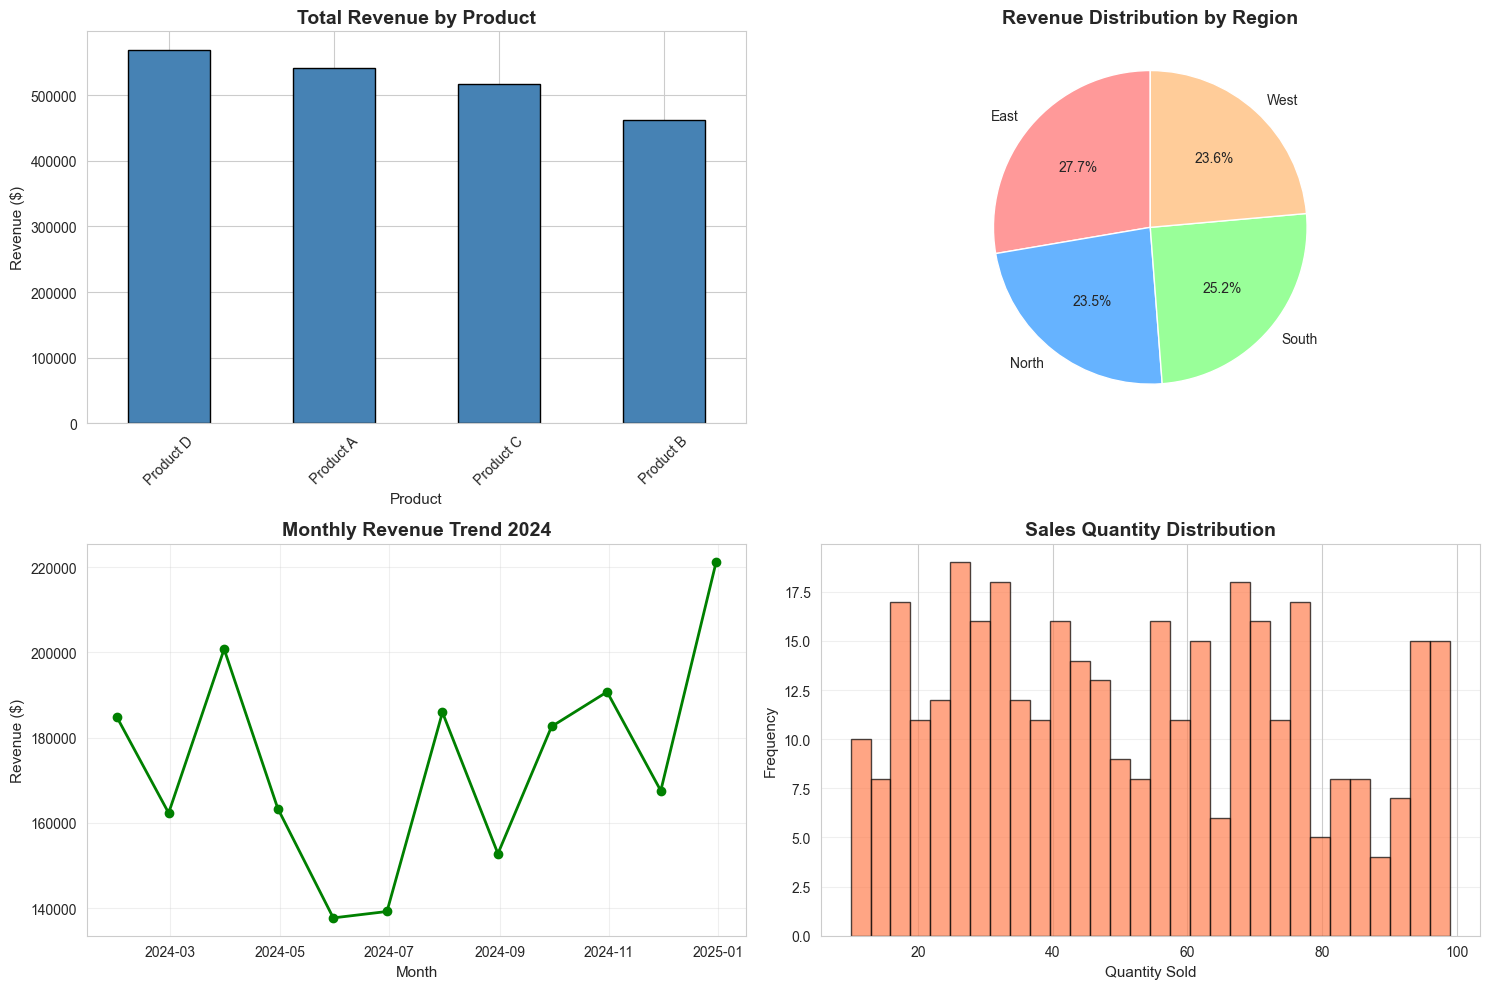

✓ Analysis complete! Charts saved to data/analysis_results.png


In [7]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Revenue by Product
product_revenue = sales_data.groupby('product')['revenue'].sum().sort_values(ascending=False)
product_revenue.plot(kind='bar', ax=axes[0,0], color='steelblue', edgecolor='black')
axes[0,0].set_title('Total Revenue by Product', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Revenue ($)', fontsize=11)
axes[0,0].set_xlabel('Product', fontsize=11)
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Revenue Distribution by Region
region_revenue = sales_data.groupby('region')['revenue'].sum()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
axes[0,1].pie(region_revenue, labels=region_revenue.index, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,1].set_title('Revenue Distribution by Region', fontsize=14, fontweight='bold')

# 3. Monthly Revenue Trend
monthly_revenue = sales_data.groupby(pd.Grouper(key='date', freq='M'))['revenue'].sum()
axes[1,0].plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2, markersize=6, color='green')
axes[1,0].set_title('Monthly Revenue Trend 2024', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Month', fontsize=11)
axes[1,0].set_ylabel('Revenue ($)', fontsize=11)
axes[1,0].grid(True, alpha=0.3)

# 4. Quantity Distribution
axes[1,1].hist(sales_data['quantity'], bins=30, color='coral', edgecolor='black', alpha=0.7)
axes[1,1].set_title('Sales Quantity Distribution', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Quantity Sold', fontsize=11)
axes[1,1].set_ylabel('Frequency', fontsize=11)
axes[1,1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../data/analysis_results.png', dpi=300, bbox_inches='tight')
plt.show()

print('✓ Analysis complete! Charts saved to data/analysis_results.png')

In [8]:
# Additional Insights
print('ADDITIONAL INSIGHTS')
print('='*50)

# Best performing day
best_day = sales_data.groupby('date')['revenue'].sum().idxmax()
best_revenue = sales_data.groupby('date')['revenue'].sum().max()
print(f'Best Sales Day: {best_day.strftime("%Y-%m-%d")} (${best_revenue:,.2f})')

# Average price by product
print('\nAverage Price by Product:')
print(sales_data.groupby('product')['price'].mean().sort_values(ascending=False).to_string())

# Regional performance
print('\nRegional Performance (Total Quantity):')
print(sales_data.groupby('region')['quantity'].sum().sort_values(ascending=False).to_string())

ADDITIONAL INSIGHTS
Best Sales Day: 2024-12-13 ($18,442.23)

Average Price by Product:
product
Product C    115.309453
Product A    110.644344
Product B    108.840383
Product D    107.281331

Regional Performance (Total Quantity):
region
East     5233
North    4836
South    4801
West     4278
